## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [46]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [47]:
df= pd.read_csv("ab_data.csv") # read the dataset
df.head() # show the first five enteries in dataset

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [48]:
print (df.shape[0]) #print number of rows in dataset

294478


c. The number of unique users in the dataset.

In [49]:
len(df.user_id.unique()) # number of unique users_ids

290584

d. The proportion of users converted.

In [50]:
print (df.converted.sum()/df.shape[0] * 100 ,"%")
# portion of users converted

11.9659193556 %


e. The number of times the `new_page` and `treatment` don't match.

In [51]:
df.query("landing_page!='new_page' and group =='treatment'").shape[0]+df.query("landing_page=='new_page' and group !='treatment'").shape[0]
# Number of times new page and treatment don't match is number of times landing page is new page and group is not treatment + 
# number of times group is treatment while page is not new page 

3893

f. Do any of the rows have missing values?

In [52]:
df.isnull().sum() # calculate number of null values 

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [53]:
treat_new_page = df.query("group=='treatment' and landing_page =='new_page'")# get rows where treatment does match with new_page 
control_old_page = df.query("group=='control' and landing_page =='old_page'")# get rows where control does match with old_page
df2 = pd.concat([treat_new_page ,control_old_page ]) # concat the rows from two variables above into df2 
df2

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


Please  note that cell above code was inspired by https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [54]:
print(df2.query("group=='treatment' and landing_page !='new_page'").shape[0])
print(df2.query("group=='control' and landing_page !='old_page'").shape[0])
#Make sure that df2 doesn't have any invalid enteries

0
0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [55]:
len(df2.user_id.unique()) # get unique user_ids in dataset

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [56]:
print(df2.duplicated('user_id').sum()) # Get duplicates in user_id
df2[df2.duplicated('user_id')==True]# get the user repeated

1


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [57]:
df2.iloc[2893] #locate the repeated user 

user_id                             723335
timestamp       2017-01-15 12:29:50.410123
group                            treatment
landing_page                      new_page
converted                                0
Name: 5917, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [58]:
df2.drop(2893 , inplace = True)# drop the duplicated user


In [59]:
print(df2.duplicated('user_id').sum()) # Get duplicates in user_id

0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [60]:
print ("probability = ",df2.converted.mean()) 
# print  probability of an individual converting 
#regardless of the page they receive

probability =  0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [61]:
print ("probability = " ,df2.query("group == 'control'").converted.mean())
# print the probability that an individual was in the control group 
#and converted

probability =  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [62]:
print ("probability = " ,df2.query("group == 'treatment'").converted.mean())
# print the probability that an individual was in the treatment group 
#and converted

probability =  0.118808065515


d. What is the probability that an individual received the new page?

In [63]:
print ("probability = ",(df2.landing_page =='new_page').mean())
# print probability that an individual received the new page

probability =  0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$**: **$p_{new}$** - **$p_{old}$** <=0 <br>
**$H_{1}$**: **$p_{new}$** - **$p_{old}$** >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [64]:
P_new = df2.converted.mean() # make p_new equal mean
                            #of converted column (feature)
print (P_new)

0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [65]:
P_old = df2.converted.mean() # make p_old equal mean
                            #of converted column (feature)
print(P_old)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [66]:
n_new = df2.query("group=='treatment'").shape[0]
# make n_new equal to the number of individuals 
#in the treatment group
print(n_new) # print n_new

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [67]:
n_old = df2.query("group=='control'").shape[0]
# make n_old equal to the number of individuals 
#in the control  group
print(n_old)# print n_old

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [68]:
new_page_converted = np.random.binomial(n = 1, p=P_new,
                                        size =n_new)
# we can simulate by drawing sample from binomial dist 
# with p probability of success = P_new and size equal to 
# n_new 

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [69]:
 old_page_converted = np.random.binomial(n = 1, p=P_old,
                                        size =n_old)
# we can simulate by drawing sample from binomial dist 
# with p probability of success = P_old and size equal to 
# n_old

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [70]:
print (new_page_converted.shape[0]-old_page_converted.shape[0]) # get difference in rows from old and new page

36


In [71]:
# To Remove that difference in rows I am going to append 36 zeros 
# to the old_page_converted 
new_page_converted.mean() -  np.append(old_page_converted ,(np.zeros(36))).mean()

0.00057807446149611696

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [72]:
samples_num = 10000 # create num of samples equal to 10,000
difference= [] #create an empty list 
for i in range(samples_num): # iterate for 10,000 times 
    new_page_converted = np.random.binomial(n = 1, p=P_new,
                                        size =n_new)
    # we can simulate by drawing sample from binomial dist 
    # with p probability of success = P_new and size equal to 
    # n_new 
    old_page_converted = np.random.binomial(n = 1, p=P_old,
                                            size =n_old)
    # we can simulate by drawing sample from binomial dist 
    # with p probability of success = P_old and size equal to 
    # n_old                                     
    difference.append(new_page_converted.mean() - old_page_converted.mean())
    #append the difference in mean between the two pages
p_diffs = np.array(difference)
                                          

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

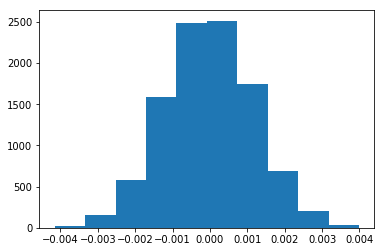

In [73]:
plt.hist(p_diffs); # Make Histogram plot for  p_diffs

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [74]:
act_diffs = df.query("group == 'treatment'").converted.mean() - df.query("group == 'control'").converted.mean()
# get the actual convertion difference 
(p_diffs > act_diffs).mean() #calculate the  p-value 

0.89000000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**I computed in j the p-value , I did this through <br>
1-Getting the diference between control and treatment groups(in other words the difference between the old & new pages) conversion rates from the dataset (data gathered )
<br>
2- Making 10,000 simulation to get the same difference mentioned in above point from the simulated samples
<br><br>
p-value is used to either reject the null hypothesis($H_{0}$) or fail to reject it , in our case the p-value is approx. 0.89 which is very high meaning that we can't reject the null hypothesis  .**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [75]:
import statsmodels.api as sm


convert_old = df2.query('landing_page == "old_page"').converted.sum()
#Conversion numbers for old page
convert_new = df2.query('landing_page == "new_page"').converted.sum() 
#Conversion numbers for new page
n_old = df2.query('landing_page=="old_page"').count()[0] 
#the number of individuals who received old page 
n_new = df2.query('landing_page=="new_page"').count()[0] 
#the number of individuals who received new page 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [76]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [ n_new, n_old], alternative='larger')
# Get z-score and p-value 
print('z-score ='  , z_score) # print z-score
print('p-value =' , p_value) # print p-value

z-score = -1.31092419842
p-value = 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Both the computed z-score and p-value say that we shall not reject the null hypothesis and that agree with the findings we found in parts j and k .**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**LOGESTIC REGRESSION.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [77]:
df2["intercept"]=1# Add an intercept column
dum = pd.get_dummies(df2.group).treatment#prepare  the new dummy col
df2['ab_page'] = dum #create   the new dummy col


In [78]:
df2.head()[["group","ab_page"]] #check if changes is done sucessfully


,group,ab_page
2,treatment,1
3,treatment,1
6,treatment,1
8,treatment,1
9,treatment,1


In [79]:
df2.tail()[["group","ab_page"]] #check if changes is done sucessfully

,group,ab_page
294471,control,0
294473,control,0
294474,control,0
294475,control,0
294476,control,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [80]:
log_reg=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
# Create logestic regression  model 
log_reg_result=log_reg.fit()# fit the model  

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

I faced a problem using : log_reg_result.summary()
<br> and i fixed it using code in the following stackoverflow link
https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

In [81]:
log_reg_result.summary2() # get the model summary 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-12 11:54 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.1899 , that is lower than the p-value calculated at part II the reason behind that is that we added intercept (which is equal one) so the value differs , However the p-value is still > our alpha (0.05) then that ensure our situation that we fail to reject null hypothesis .
<br>
Using logestic regression : ($H_{1}$ = $p_{new}$** - **$p_{old}$** !=0)<br>
**While in part II** : **$H_{1}$**: **$p_{new}$** - **$p_{old}$** >0


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other features such as users age or gender or Social situation ....etc , Might be useful and might give us an idea of why and how to deal with conversion rates , the main disadvantages of  adding another terms is that we might not know which factors are most important to give it higher piority than others and gather most data about it  and we can have multiple features that have opposite direcions or have collisions with each other  .**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [82]:
countries_df = pd.read_csv('countries.csv') #read the countries 
                                            #csv file
countries_df.head(20) # print the first 20 enteries of dataset

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
5,909908,UK
6,811617,US
7,938122,US
8,887018,US
9,820683,US


In [83]:
countries_df.country.unique() # get unique values of country column

array(['UK', 'US', 'CA'], dtype=object)

In [84]:
merged_df = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner') #merge the two datasets 
merged_df.head()#get the first 5 enteries of the meged dataset 

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [85]:
merged_df[["CA", "UK", "US"]] = pd.get_dummies(merged_df['country']) #Create dummy variables for countries 
merged_df.head() #see firt 5 enteries of dataset

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [86]:
merged_df.query("CA == 1")# get rows where CA is 1 to ensure that dummy variables is done right (since we could not verify
                            #that from showing first 5 enteries in cell above)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
813256,CA,2017-01-24 12:31:10.716026,treatment,new_page,0,1,1,1,0,0
942405,CA,2017-01-04 07:29:26.341719,treatment,new_page,0,1,1,1,0,0
867026,CA,2017-01-13 21:27:57.458482,control,old_page,0,1,0,1,0,0
744693,CA,2017-01-23 06:56:31.963050,control,old_page,1,1,0,1,0,0
665919,CA,2017-01-10 19:25:16.865518,treatment,new_page,0,1,1,1,0,0
691574,CA,2017-01-05 15:21:28.546797,treatment,new_page,0,1,1,1,0,0
794810,CA,2017-01-20 19:16:36.746912,control,old_page,0,1,0,1,0,0
888356,CA,2017-01-06 23:33:36.669123,treatment,new_page,0,1,1,1,0,0
647325,CA,2017-01-06 04:08:01.782305,treatment,new_page,0,1,1,1,0,0


In [87]:
merged_df['intercept'] = 1 # add intercept col 
log_reg_merged = sm.Logit(merged_df['converted'], merged_df[['US', 'CA','intercept', 'ab_page']]) 
#make logestic regression model 


In [88]:
res = log_reg_merged.fit() # fit the model 
res.summary2()# get the model summary 

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-12 11:54 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

**The p-value is nearly 0.19 , So even after adding countries our p-value > alpha (0.05) so again we shall not reject our null hypothesis , this means that countries  didn't affect our conclusions and findings**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
res.summary2()# get the model summary 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-12 11:49 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

<a id='conclusions'></a>
## Conclusions

**After our full study we can Summarize our findings as the following**<br>
1-Our p-values was always bigger than our alpha
<br>
2-Even putting countries into consideration didn't cahnge our conclusions 
<br>
3- We Shall not reject our Null hypothesis 
<br>
4- We suggest that new page didn't result in more conversion rates than the old page 


In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0